In [15]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### A / B testing

Let's take a closer look at A / B testing on the example of a website. The site has two designs - old and new, and we want to evaluate how much the new design is better than the old one. To do this, site users are randomly divided into control and test groups. The control group is shown the old version of the site, the test group is shown the modified version. There are several ways to evaluate a change, the easiest is to evaluate a conversion. Conversion is the percentage of users who performed a predetermined action (for example, subscribing, clicking a button, filling out a form).

### Data Description

First, you need to load data from the file `a_b_testing.csv` using the function` read_csv` from the library `pandas`. In this case, 1 - a subscription was made to the site, 0 - there was no subscription. A - control group, B - test group.

### Confidence interval

In some cases, the parameters of the normal distribution can be derived mathematically, and below we will see how.

Let's represent the number of users as a random variable from the binomial distribution with the parameters `n` - the number of users and` p` - the probability of conversion, or as the sum of `n` independent coin tosses. Let's define the following random variable:

$$Y = X_{1} + X_{2} + \dots + X_{n} , \, $$
where the random variable $ X_ {i} $ has the Bernoulli distribution. For a random variable $ Y $, the expectation and variance are equal:

$$\mu = np, \, \sigma^{2} = np\cdot(1 - p)$$

Further, assuming the central limit theorem (the random variables $ X_ {i} $ are distributed independently and the sample size is large), we get:

$$Y \sim \mathcal{N}(np \, np\cdot(1 - p))\$$

We passed on from binomial to normal distribution. The next step is to standardize the normal distribution:

$$Z = \frac{Y - np}{\sqrt{np\cdot(1-p)}} \sim \mathcal{N}(0, \, 1) $$ 

Let's transform the expression above:

$$Z = \frac{Y - np}{\sqrt{np\cdot(1-p)}} = \frac{\frac{Y}{n} - p}{\sqrt{\frac{p(1-p)}{n}}} \sim \mathcal{N}(0, \, 1) $$

Since the average sample value is the observed conversion percentage, the confidence interval will look like this:

$${P}\left(p - z_{1-\frac{\alpha}{2}} \sqrt{\frac{p(1-p)}{n}} \le \mu \le p + z_{1-\frac{\alpha}{2}}\sqrt{\frac{p(1-p)}{n}}\right) = 1-\alpha$$

Further we will find a confidence interval for the average conversion of users from a control sample with a 95% significance level.

In [16]:
df = pd.read_csv('a_b_testing.csv')

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
df  #1 - there was a subscription, 0 - there was no subscription. A - control group, which was shown the old site, B - test group, it was shown the new version

converted group
0             1     A
1             0     A
2             0     A
3             1     B
4             1     A
...         ...   ...
3995          1     A
3996          0     A
3997          1     B
3998          0     B
3999          1     A

[4000 rows x 2 columns]

In [19]:
#We need calculate the confidence interval for the average conversion of users from the control sample (i.e. A)

In [20]:
group_a = (df[df.group == 'A'])
group_a #control group data
data_ = group_a['converted']
data = np.array(data_)


(array([2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 8.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        1.200e+01, 8.000e+00, 8.000e+00, 1.600e+01, 3.000e+01, 2.900e+01,
        5.000e+01, 5.000e+01, 5.700e+01, 7.800e+01, 9.400e+01, 1.100e+02,
        1.420e+02, 1.700e+02, 1.990e+02, 3.080e+02, 2.740e+02, 2.980e+02,
        3.670e+02, 4.310e+02, 5.390e+02, 5.330e+02, 6.350e+02, 6.960e+02,
        9.710e+02, 8.960e+02, 9.320e+02, 1.091e+03, 1.131e+03, 1.217e+03,
        1.361e+03, 1.367e+03, 1.416e+03, 1.866e+03, 1.519e+03, 1.560e+03,
        1.686e+03, 1.620e+03, 1.601e+03, 1.597e+03, 1.576e+03, 1.586e+03,
        1.878e+03, 1.478e+03, 1.441e+03, 1.432e+03, 1.261e+03, 1.205e+03,
        1.227e+03, 1.134e+03, 1.001e+03, 1.165e+03, 8.360e+02, 7.060e+02,
        6.670e+02, 5.840e+02, 5.670e+02, 4.710e+02, 4.380e+02, 3.740e+02,
        3.770e+02, 2.720e+02, 2.390e+02, 1.700e+02, 1.600e+02, 1.340e+02,
        1.330e+02, 1.050e+02, 5.900e+0

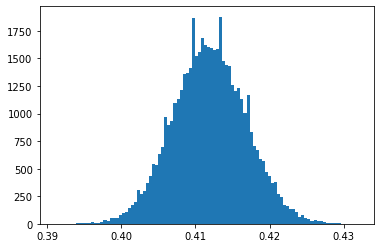

In [21]:
taxi_mex = pd.read_csv('mex_clean.csv')
def generate_distribution_sample(data, sample_size, dist_size):
    sample_means = []
    for i in (range(dist_size)):
        sample = np.random.choice(a = data, size = sample_size)
        sample_means.append(np.mean(sample))
    return sample_means
#First we need to generate a distribution of averages. To do this, we need to specify a sample size and generate a lot of such samples. As you remember, one of the conditions of the theorem was that the larger the sample size, the closer is the distribution of averages to the normal distribution.
sample_size = 10000
dist_size = 50000
sample_means = generate_distribution_sample(data,
                                        sample_size, dist_size)   #len(sample_means) = 50000

plt.hist(sample_means, bins=100)
#plt.xlabel(’distance in km’)   #got a histogram of the distribution of averages, and everuthing is correct - the more average sums we consider, the closer the distribution is to normal.

In [22]:
np.sort(sample_means)
lb = np.percentile(sample_means,5)
ub = np.percentile(sample_means, 95)
print("conf interval for bootstrap:", (lb, ub))  #received a confidence interval for the average users conversion of the control sample.

conf interval for bootstrap: (0.4039, 0.41999999999999993)


In [23]:
np.mean(data_)

0.4118802160039273

In [24]:
def compute_ci_t(data_, alpha=0.95):
    n = data_.shape[0]
    mu, se = np.mean(data_), stats.sem(data_)
    bound = se * stats.t.ppf((1 + alpha) / 2., n-1)
    return mu - bound, mu + bound

In [25]:
ci_t = compute_ci_t(data, alpha=0.95)
print("conf interval with t test for 2000 sample size:", ci_t)  

conf interval with t test for 2000 sample size: (0.3904889829710935, 0.4332714490367611)


# The A/B test task

Let's take a look at two independent samples of $X$ and $Y$ for which  $\mu_x$ and $\mu_y$ are defining the average distribution values.

The following hypothesis is:
$$
H_0: \mu_x = \mu_y
$$
against the alternative:

$$
H_1: \mu_x \ne \mu_y.
$$

Если гипотеза $H_0$ отвергается, то показатель действительно поменялся.

You can also write the test in another way:
$$
H_0: \mu_x \le \mu_y
$$

against the alternative:

$$
H_1: \mu_x > \mu_y
$$

### Student's statisctics.

We will find the value of the Student's statistic under the assumption of sample independence using the formula:

$$
T(X, Y) = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_x^2}{n} + \frac{s_y^2}{m}}}
$$

where `n` - control sample size, `m`  - test sample size.

### РЕШЕНИЕ

In [27]:
group_a = (df[df.group == 'A'])
group_a #Данные контрольной группы
data_ = group_a['converted']
A_array =np.array(data_)
A = data_.mean()
print(group_a)



      converted group
0             1     A
1             0     A
2             0     A
4             1     A
7             0     A
...         ...   ...
3993          1     A
3994          0     A
3995          1     A
3996          0     A
3999          1     A

[2037 rows x 2 columns]


In [28]:
df = pd.read_csv('a_b_testing.csv')



In [29]:
group_b = (df[df.group == 'B'])
group_b #Control group data
data__ = group_b['converted']
B_array = np.array(data__)
B = data__.mean()
print(group_b)

      converted group
3             1     B
5             1     B
6             0     B
8             1     B
16            0     B
...         ...   ...
3976          1     B
3983          1     B
3985          0     B
3997          1     B
3998          0     B

[1963 rows x 2 columns]


In [38]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(A_array, B_array)
stat, p

(-1.6126205013707797, 0.10690590820177126)

In [39]:
round(p,2)

0.11